In [ ]:
#!wget https://iasbs.ac.ir/~hkhojasteh/kerasworkshop/Data_hoda_full.mat

In [ ]:
import cv2
import numpy as np
from scipy import io

def load_data(training_sample_size=1000, test_sample_size=200, size=5):
    #load dataset
    trs = training_sample_size
    tes = test_sample_size
    dataset = io.loadmat('./Data_hoda_full.mat')

    #test and training set
    X_train_orginal = np.squeeze(dataset['Data'][:trs])
    y_train = np.squeeze(dataset['labels'][:trs])
    X_test_original = np.squeeze(dataset['Data'][trs:trs+tes])
    y_test = np.squeeze(dataset['labels'][trs:trs+tes])

    #resize
    X_train_5by5 = [cv2.resize(img, dsize=(size, size)) for img in X_train_orginal]
    X_test_5by_5 = [cv2.resize(img, dsize=(size, size)) for img in X_test_original]
    #reshape
    X_train = [x.reshape(size*size) for x in X_train_5by5]
    X_test = [x.reshape(size*size) for x in X_test_5by_5]
    
    return X_train, y_train, X_test, y_test

In [ ]:
import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
import numpy as np
import matplotlib.pyplot as plt

model = Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_6 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 64)               

In [ ]:
import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(100)  # for reproducibility

x_train_original, y_train_original, x_test_original, y_test_original = load_data(
                                                                        training_sample_size=3500,
                                                                        test_sample_size=400,size=28)

#Preprocess input data
''' input data in numpy array format'''
x_train = np.array(x_train_original)
x_test = np.array(x_test_original)
''' normalize our data values to the range [0, 1]'''
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

#Reshape to original image shape (n x 784)  ==> (n x 28 x 28 x 1)
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)


#Preprocess class labels
y_train = keras.utils.to_categorical(y_train_original, num_classes=10)
y_test = keras.utils.to_categorical(y_test_original, num_classes=10)


#test and validation set
x_val = x_test[:20000]
x_test = x_test[20000:]
y_val = y_test[:20000]
y_test = y_test[20000:]

#Define model architecture
model = Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))


#Compile model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


#Fit model on training data
history = model.fit(x_train, y_train,
          epochs=200, batch_size=256, validation_data = (x_val, y_val))

Train on 3500 samples, validate on 400 samples
Epoch 1/200
3500/3500 [==============================] - 0s 96us/step - loss: 1.9983 - accuracy: 0.3480 - val_loss: 1.2076 - val_accuracy: 0.7700
Epoch 2/200
3500/3500 [==============================] - 0s 33us/step - loss: 1.0549 - accuracy: 0.6451 - val_loss: 0.5528 - val_accuracy: 0.8175
Epoch 3/200
3500/3500 [==============================] - 0s 32us/step - loss: 0.7072 - accuracy: 0.7597 - val_loss: 0.3560 - val_accuracy: 0.8875
Epoch 4/200
3500/3500 [==============================] - 0s 34us/step - loss: 0.5463 - accuracy: 0.8166 - val_loss: 0.2408 - val_accuracy: 0.9150
Epoch 5/200
3500/3500 [==============================] - 0s 31us/step - loss: 0.4167 - accuracy: 0.8509 - val_loss: 0.1963 - val_accuracy: 0.9475
Epoch 6/200
3500/3500 [==============================] - 0s 37us/step - loss: 0.3550 - accuracy: 0.8820 - val_loss: 0.1587 - val_accuracy: 0.9600
Epoch 7/200
3500/3500 [==============================] - 0s 36us/step - loss:

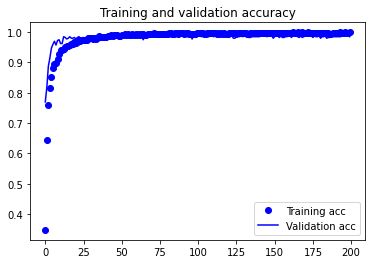

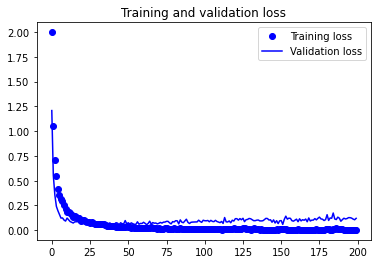

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

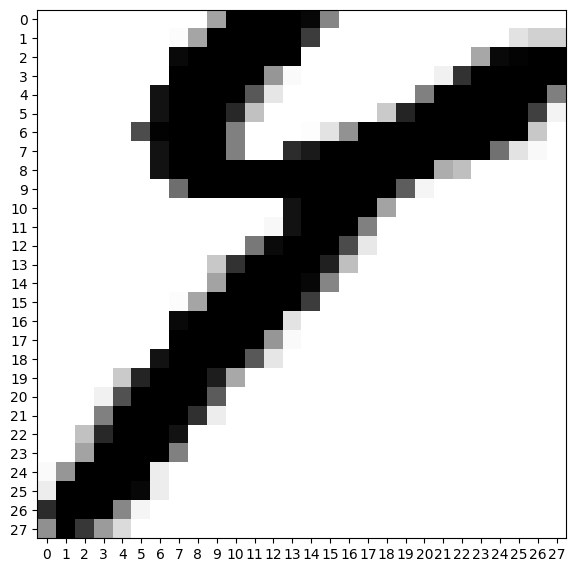

  0   0   0   0   0   0   0   0   0  91 255 255 255 255 248 122   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   3  90 255 255 255 255 255 194   0   0   0   0   0   0   0   0   0   0  29  46  46 
  0   0   0   0   0   0   0 246 255 255 255 255 255 255   0   0   0   0   0   0   0   0   0  88 246 252 255 255 
  0   0   0   0   0   0   0 255 255 255 255 255 105   5   0   0   0   0   0   0   0  14 205 255 255 255 255 255 
  0   0   0   0   0   0 237 255 255 255 255 167  25   0   0   0   0   0   0   0 127 255 255 255 255 255 255 128 
  0   0   0   0   0   0 237 255 255 255 214  62   0   0   0   0   0   0  53 218 255 255 255 255 255 255 191  12 
  0   0   0   0   0 179 253 255 255 255 127   0   0   0   2  27 109 255 255 255 255 255 255 255 255 255  55   0 
  0   0   0   0   0   0 237 255 255 255 127   0   0 211 229 255 255 255 255 255 255 255 255 255 141  27   6   0 
  0   0   0   0   0   0 237 255 255 255 255 255 255 255 255 255 255 255 255 255 255  82  64   0 

In [ ]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(7, 7), dpi=100, facecolor='w', edgecolor='k')

#sample = 190
sample = 210
image = 255 - x_train[sample]

major_ticks = np.arange(0, 28)
minor_ticks = np.arange(0, 28)
plt.xticks(major_ticks)
plt.yticks(major_ticks)
#plt.grid(color='gray', ls = '-.', lw = 0.5, alpha=0.5)
plt.imshow(image.squeeze(), cmap="gray")
plt.show()

def organized(nums): 
  for i in range(0, nums.shape[0]):
    for j in range(0, nums.shape[1]):
      n = (nums[i, j] * 255).astype('uint8')
      print("{:3d}".format(n), end=' ')
    print("")

organized(x_train[sample].squeeze())

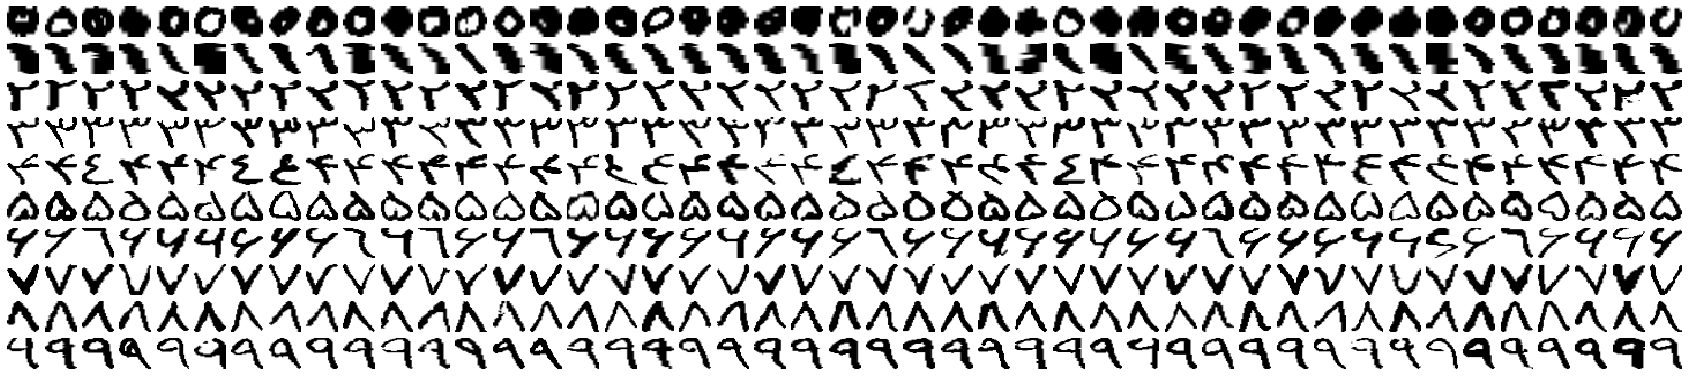

In [ ]:
num_of_samples = 45
digits = {}

for i in range(10):
    digits[i] = np.where(y_train_original==i)[0][:num_of_samples]

import matplotlib.pyplot as plt
fig, ax = plt.subplots(10, num_of_samples, sharex='none', sharey='none')
fig.set_figheight(10 / 1.5)
fig.set_figwidth(num_of_samples / 1.5)
for i in range(10):
    for j in range(num_of_samples):
      ax[i, j].axis('off')
      img = 255 - x_train[digits[i][j]].squeeze()
      ax[i, j].imshow(img, cmap='gray', interpolation='nearest', aspect='auto')

In [ ]:
!pip install kaggle

from google.colab import files
files.upload()

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d rhammell/planesnet

Saving kaggle.json to kaggle.json
 93% 151M/162M [00:01<00:00, 103MB/s] 
100% 162M/162M [00:01<00:00, 105MB/s]


In [ ]:
!unzip planesnet.zip

Streaming output truncated to the last 5000 lines.
  inflating: planesnet/planesnet/planesnet/1__20170222_231256_0c27__-122.380731494_37.6163485228.png  
  inflating: planesnet/planesnet/planesnet/1__20170222_231256_0c27__-122.381222018_37.6164942229.png  
  inflating: planesnet/planesnet/planesnet/1__20170222_231256_0c27__-122.381772347_37.6151172939.png  
  inflating: planesnet/planesnet/planesnet/1__20170222_231256_0c27__-122.382252336_37.6141956997.png  
  inflating: planesnet/planesnet/planesnet/1__20170222_231256_0c27__-122.38315357_37.6157415688.png  
  inflating: planesnet/planesnet/planesnet/1__20170222_231256_0c27__-122.383170478_37.6145066674.png  
  inflating: planesnet/planesnet/planesnet/1__20170222_231256_0c27__-122.383729791_37.6187867125.png  
  inflating: planesnet/planesnet/planesnet/1__20170222_231256_0c27__-122.384510263_37.6198917809.png  
  inflating: planesnet/planesnet/planesnet/1__20170222_231256_0c27__-122.385179849_37.6188192613.png  
  inflating: planesnet/

In [ ]:
!cp -a ./planesnet/planesnet/planesnet/. ./planesnet/planesnet/

In [ ]:
import os
import math
import sklearn
import collections
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Activation, Dense, Flatten, Dropout
from keras.layers.normalization import BatchNormalization
from keras.callbacks import LearningRateScheduler

from keras import backend as K
from keras.utils.generic_utils import get_custom_objects

In [ ]:
def LoadDir(dirname):
    imgs = [np.zeros([20,20,3])]
    labels = [0]
    for imgname in os.listdir(dirname):
        
        if(imgname[0] == '1'):
            labels.append(1)
        else:
            labels.append(0)
        
        if os.path.isfile(os.path.join(dirname, imgname)):
            img = Image.open(os.path.join(dirname, imgname))
            img = np.array(img)
            imgs.append(img)
        
    return np.array(imgs),np.array(labels)
imgs, labels = LoadDir(r'planesnet/planesnet/')

In [ ]:
labels = labels[:imgs.shape[0]]
print(labels.shape)

(32001,)


In [ ]:
x_train, x_temp, y_train, y_temp = train_test_split(imgs, labels, test_size = 0.20, random_state = 42, shuffle = True)
x_valid, x_test, y_valid, y_test = train_test_split(x_temp, y_temp, test_size = 0.50, random_state = 42, shuffle = True)

In [ ]:
x_train1 = np.rot90(x_train, k = 1, axes=(1, 2))  #Generate new samples
x_train2 = np.rot90(x_train, k = 2, axes=(1, 2))
x_train3 = np.rot90(x_train, k = 3, axes=(1, 2))

x_train = np.append(x_train, x_train1, axis = 0)
x_train = np.append(x_train, x_train2, axis = 0)
x_train = np.append(x_train, x_train3, axis = 0)

y_train = np.append(y_train, y_train)
y_train = np.append(y_train, y_train)

print(x_train.shape)

(102400, 20, 20, 3)


In [ ]:
model = Sequential()

def swish(x):
    return (K.sigmoid(x) * x)

get_custom_objects().update({'swish': Activation(swish)})

model.add(Conv2D(16, 2, padding = 'valid', input_shape = (20,20,3)))
model.add(BatchNormalization())
model.add(Activation('tanh'))
#model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32, 3, padding = 'valid'))
model.add(BatchNormalization())
model.add(Activation('swish'))
#model.add(Dropout(0.2))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, 2, kernel_initializer = 'random_uniform', padding = 'valid'))   #64 2
model.add(BatchNormalization())
model.add(Activation('swish'))
#model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

opt = keras.optimizers.SGD(lr = 0.01, momentum = 0.1, decay = 0.00005, nesterov = True)
model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['binary_accuracy'])
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 19, 19, 16)        208       
_________________________________________________________________
batch_normalization_6 (Batch (None, 19, 19, 16)        64        
_________________________________________________________________
activation_9 (Activation)    (None, 19, 19, 16)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 9, 9, 16)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 7, 7, 32)          4640      
_________________________________________________________________
batch_normalization_7 (Batch (None, 7, 7, 32)          128       
_________________________________________________________________
activation_10 (Activation)   (None, 7, 7, 32)         

In [ ]:
log = model.fit(x_train, y_train, shuffle = True, validation_data = (x_valid, y_valid), epochs = 200)

Epoch 1/200
3200/3200 [==============================] - 10s 3ms/step - loss: 0.5061 - binary_accuracy: 0.7616 - val_loss: 0.5018 - val_binary_accuracy: 0.7547
Epoch 2/200
3200/3200 [==============================] - 10s 3ms/step - loss: 0.5056 - binary_accuracy: 0.7627 - val_loss: 0.5077 - val_binary_accuracy: 0.7522
Epoch 3/200
3200/3200 [==============================] - 10s 3ms/step - loss: 0.5049 - binary_accuracy: 0.7627 - val_loss: 0.5031 - val_binary_accuracy: 0.7572
Epoch 4/200
3200/3200 [==============================] - 10s 3ms/step - loss: 0.5046 - binary_accuracy: 0.7632 - val_loss: 0.5018 - val_binary_accuracy: 0.7628
Epoch 5/200
3200/3200 [==============================] - 10s 3ms/step - loss: 0.5046 - binary_accuracy: 0.7641 - val_loss: 0.5027 - val_binary_accuracy: 0.7575
Epoch 6/200
3200/3200 [==============================] - 9s 3ms/step - loss: 0.5046 - binary_accuracy: 0.7630 - val_loss: 0.5030 - val_binary_accuracy: 0.7538
Epoch 7/200
3200/3200 [==================

In [ ]:
y_pred = model.predict(x_test)
y_pred[y_pred > 0.5] = 1
y_pred[y_pred < 0.5] = 0
y_pred=np.asarray(y_pred, dtype=bool)
target_names = ['No Plane', 'Plane']
print(classification_report(y_test, y_pred, target_names=target_names))
print('Accuracy:', accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

    No Plane       0.80      0.93      0.86      2416
       Plane       0.56      0.27      0.37       785

    accuracy                           0.77      3201
   macro avg       0.68      0.60      0.61      3201
weighted avg       0.74      0.77      0.74      3201

Accuracy: 0.7685098406747891


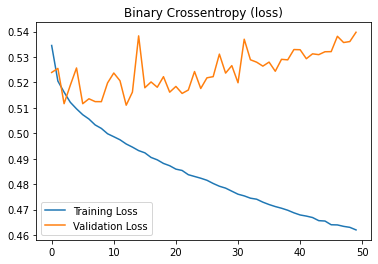

In [ ]:
#Training loss vs validation loss
tloss = log.history['loss']
vloss = log.history['val_loss']
plt.plot(np.linspace(0,len(tloss)-1, len(tloss)), tloss, label='Training Loss')
plt.plot(np.linspace(0,len(vloss)-1, len(vloss)), vloss, label='Validation Loss')
plt.title('Binary Crossentropy (loss)')
plt.legend()

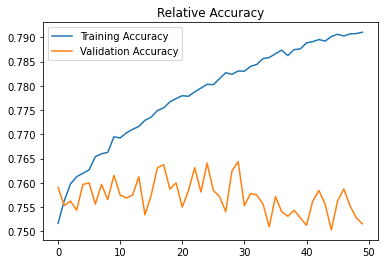

In [ ]:
#Training accuracy vs validation accuracy
tac = log.history['binary_accuracy']
vac = log.history['val_binary_accuracy']
plt.plot(np.linspace(0,len(tac)-1, len(tac)), tac, label='Training Accuracy')
plt.plot(np.linspace(0,len(vac)-1, len(vac)), vac, label='Validation Accuracy')
plt.title('Relative Accuracy')
plt.legend()

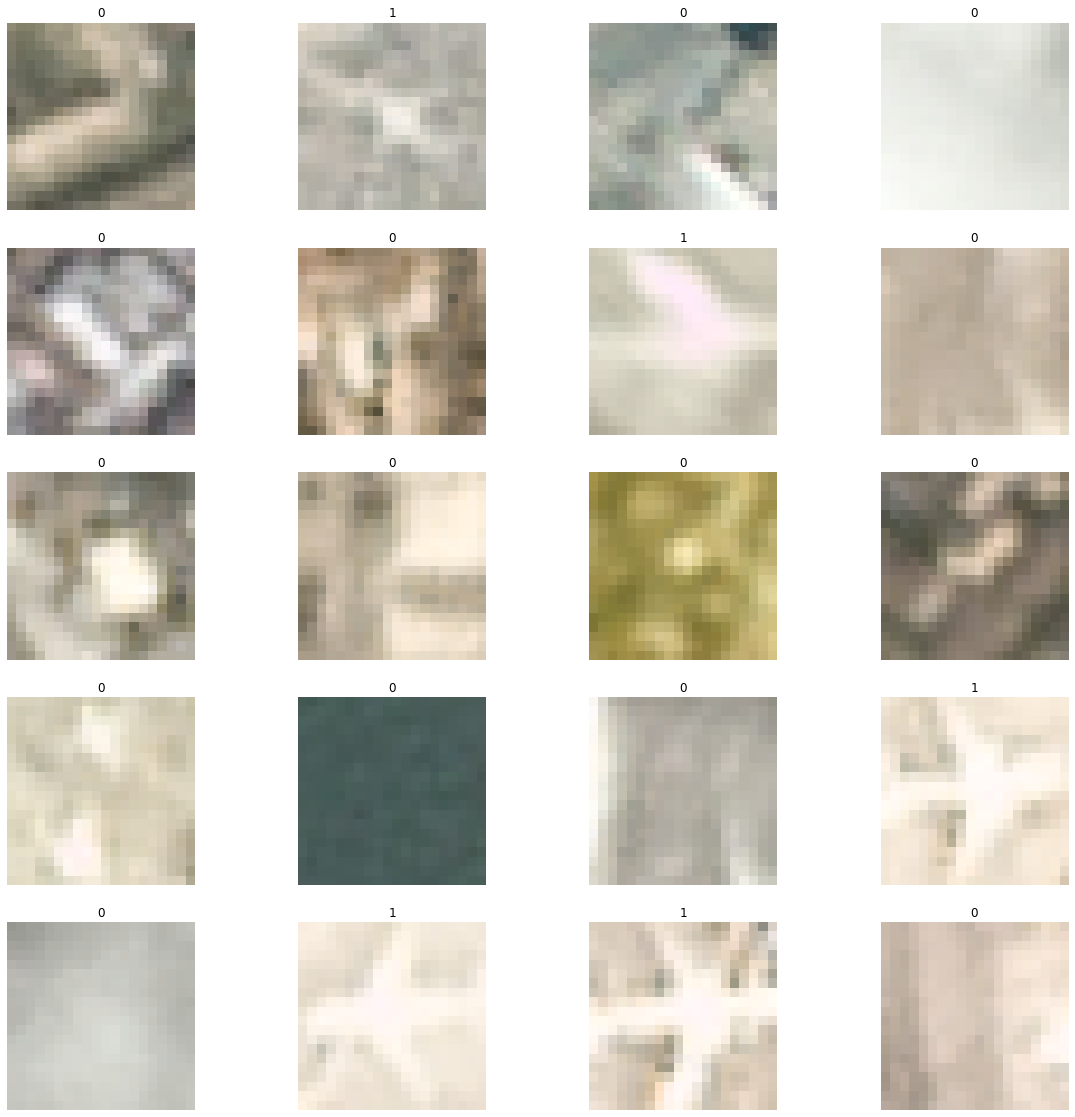

In [ ]:
import pandas as pd
from skimage.io import imread

planes = []

all_planes = os.listdir(r'planesnet/planesnet/')
for ac in all_planes:
    planes.append((ac[0],str('planesnet/planesnet/') + "/" + str(ac)))
planes = pd.DataFrame(data=planes, columns=['label','image_path'], index=None)
planes.sample(5)

random_samples = []

for item in planes.sample(20).iterrows():
    random_samples.append((item[1].label, item[1].image_path))

f, ax = plt.subplots(5, 4, figsize=(20, 20))
for i,sample in enumerate(random_samples):
    ax[i//4, i%4].imshow(imread(random_samples[i][1]))
    ax[i//4, i%4].set_title(random_samples[i][0])
    ax[i//4, i%4].axis('off')
plt.show()   


In [ ]:
x_test.shape

(3201, 20, 20, 3)

In [ ]:
import matplotlib.pyplot as plt

def visualize_incorrect_labels(x_data, y_real, y_predicted):
    y_predicted = np.round(y_predicted)

    count = 0
    figure = plt.figure()
    incorrect_label_indices = (y_real != y_predicted)
    y_real = y_real[incorrect_label_indices]
    y_predicted = y_predicted[incorrect_label_indices]
    x_data = x_data[incorrect_label_indices, :, :, :]
    
    maximum_square = np.ceil(np.sqrt(x_data.shape[0]))
    
    for i in range(x_data.shape[0]):
        count += 1
        figure.add_subplot(maximum_square, maximum_square, count)
        plt.imshow(x_data[i, :, :, :])
        plt.axis('off')
        #plt.title("Predicted:" + str(int(y_predicted[i])) + "Real:" + str(int(y_real[i])), fontsize=10)
        plt.title("", fontsize=10)
        
    plt.show()
visualize_incorrect_labels(x_test, y_test, np.asarray(y_pred).ravel())